## Comparação e treinamento de modelos de Classificação

- Dataset retirado do site: https://archive.ics.uci.edu/ml/datasets/banknote+authentication
- Identifica características de notas falsas e verdadeiras
- Atributos: 
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer

In [1]:
#importando bibliotecas utilizadas

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
#utilizando o pandas para transformar o arquivo em um Dataframe

df_bank_note = pd.read_csv("https://pycourse.s3.amazonaws.com/banknote_authentication.txt", 
                           header=None, 
                           names=['variance', 'skewness', 'curtosis', 'entropy', 'class(target)'])

In [3]:
df_bank_note.head()

,variance,skewness,curtosis,entropy,class(target)
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
#verificando as informações do dataframe, como quantidade de linhas e colunas, dados nulos existentes e tipo dos dados.

df_bank_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   variance       1372 non-null   float64
 1   skewness       1372 non-null   float64
 2   curtosis       1372 non-null   float64
 3   entropy        1372 non-null   float64
 4   class(target)  1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
#outro método para saber quantas linhas e colunas

df_bank_note.shape

(1372, 5)

In [6]:
#informações estatísticas

df_bank_note.describe()

,variance,skewness,curtosis,entropy,class(target)
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# calculando a mediana de cada coluna
df_bank_note.median()

variance         0.49618
skewness         2.31965
curtosis         0.61663
entropy         -0.58665
class(target)    0.00000
dtype: float64

In [8]:
#quantidade de dados classificados como true ou false na coluna "class"

df_bank_note['class(target)'].value_counts()

0    762
1    610
Name: class(target), dtype: int64

In [9]:
# calculando o valor de correlação entre as variáveis skewness e curtosis
# mede a associação entre as variáveis, o resultado significa uma correlação forte.

df_bank_note['skewness'].corr(df_bank_note['curtosis'])

-0.7868952243065794

In [10]:
# verificando se existe algum dado nulo
df_bank_note.isnull().sum()

variance         0
skewness         0
curtosis         0
entropy          0
class(target)    0
dtype: int64

In [11]:
#separando dados de entrada e saída para treinamento dos modelos

X = df_bank_note.iloc[:, :-1] #dados de entrada, as primeiras 4 colunas do dataframe
y = df_bank_note.iloc[:, 4] #dados de saida, a ultima coluna (class)

In [12]:
#realizando divisão de dados entre dados teste e dados treino

from sklearn.model_selection import train_test_split   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)# divide 30% para teste

In [13]:
# processo de normalização dos dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# KNN

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier(n_neighbors=5)
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = classifier_KNN.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[234   1]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



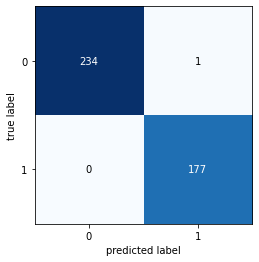

In [17]:
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [18]:
print('Accuracy of KNN', accuracy_score(y_pred, y_test)*100)

Accuracy of KNN 99.75728155339806


# Arvore de Decisão

In [19]:
# importar o classificador árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [20]:
# cria objeto classificador
clf_tree= DecisionTreeClassifier(random_state=1)

# Passando os dados de treinamento
clf_tree = clf_tree.fit(X_train, y_train)

# Realiza a previsão
y_pred = clf_tree.predict(X_test)

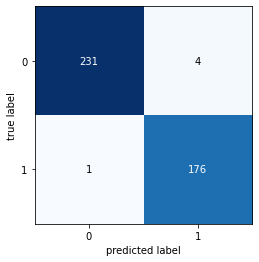

In [21]:
# Avaliando o modelo

# Plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)  #passadno dados do teste e dados da previsão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [22]:
print('Accuracy of Desicion Tree', accuracy_score(y_pred, y_test)*100)

Accuracy of Desicion Tree 98.7864077669903


# SVM

In [23]:
from sklearn.svm import SVC

# criando o objeto SVM
clf_svm = clf_svm = SVC(gamma='auto',kernel='rbf', random_state=1) 

In [24]:
clf_svm.fit(X_train, y_train)

SVC(gamma='auto', random_state=1)

In [25]:
# Realiza a previsão
y_pred = clf_svm.predict(X_test)

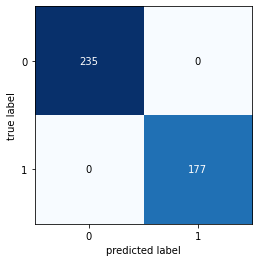

In [26]:
# avalia o modelo

# Plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)  #passando dados do teste e dados da previsão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [27]:
print('Accuracy of SVC', accuracy_score(y_pred, y_test)*100)

Accuracy of SVC 100.0


# MLP - Classificador baseado em Redes Neurais

In [28]:
# importando a biblioteca
from sklearn.neural_network import MLPClassifier

In [29]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', random_state=1)

In [30]:
clf_mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(2,), random_state=1, solver='lbfgs')

In [31]:
y_pred = clf_mlp.predict(X_test)

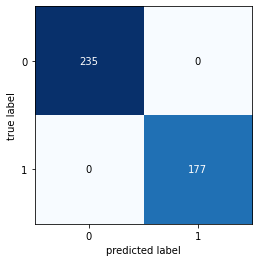

In [32]:
# avalia o modelo

# Plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)  #passando dados do teste e dados da previsão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [33]:
print('Accuracy of MLP Classifier - Neural Networks', accuracy_score(y_pred, y_test)*100)

Accuracy of MLP Classifier - Neural Networks 100.0


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)
clf_floresta = clf_floresta.fit(X_train, y_train)

In [35]:
y_pred = clf_floresta.predict(X_test)

In [36]:
clf_floresta.feature_importances_

array([0.56066718, 0.24058589, 0.14022782, 0.05851911])

In [37]:
df_bank_note.head()

,variance,skewness,curtosis,entropy,class(target)
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


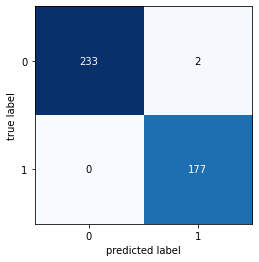

In [38]:
# avalia o modelo

# Plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)  #passando dados do teste e dados da previsão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [39]:
print('Accuracy of Random Forest', accuracy_score(y_pred, y_test)*100)

Accuracy of Random Forest 99.51456310679612


### Conclui-se que os modelos classificadores com maior indice de acertos foram o MLP e SVM